Feito por: @heitorpupim 
<a href = "https://github.com/HeitorPupim/"> github.com/HeitorPupim</a>

<h1> Parte 1 - EDA -> Exploratory Data Analysis </h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
data = pd.read_csv('/home/heitor/workspace/PythonDataScience/data/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#precisamos checar valores nulos, então vamos fazer uma soma dos valores em cada coluna:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Os dados de **Age, Cabin e Embarked** tem valores nulos, vamos tentar arrumar isso futuramente.

Agora tentaremos encontrar **quantos sobreviveram**

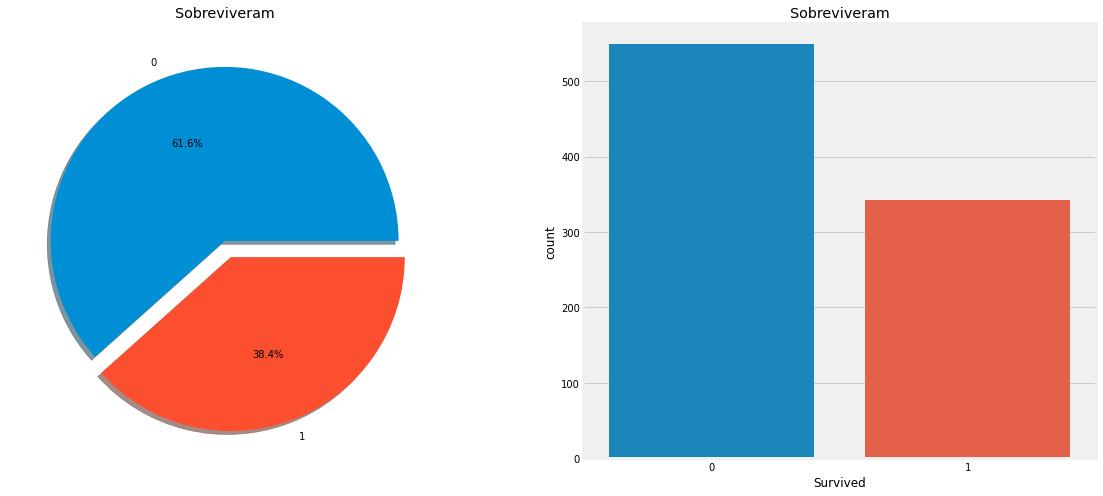

In [6]:
f, ax = plt.subplots(1 ,2 ,figsize = (18,8)) # uma linha e duas colunas de gráficos e o tamanho da figura..
data['Survived'].value_counts().plot.pie(
                                        explode = [0,0.1], # tamanho do da lacuna entre os valores do gráfico de torta
                                        autopct ='%1.1f%%' , # 
                                        ax = ax[0], #indica onde será plotado a figura, na coluna 1.
                                        shadow = True
                                        )
ax[0].set_title("Sobreviveram")
ax[0].set_ylabel('')

sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title("Sobreviveram")
plt.show()

<h1> Tipos de Características</h1>

In [7]:
# Sexo ->  Caracteristica categórica
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sexo: Sobreviventes vs Mortos')

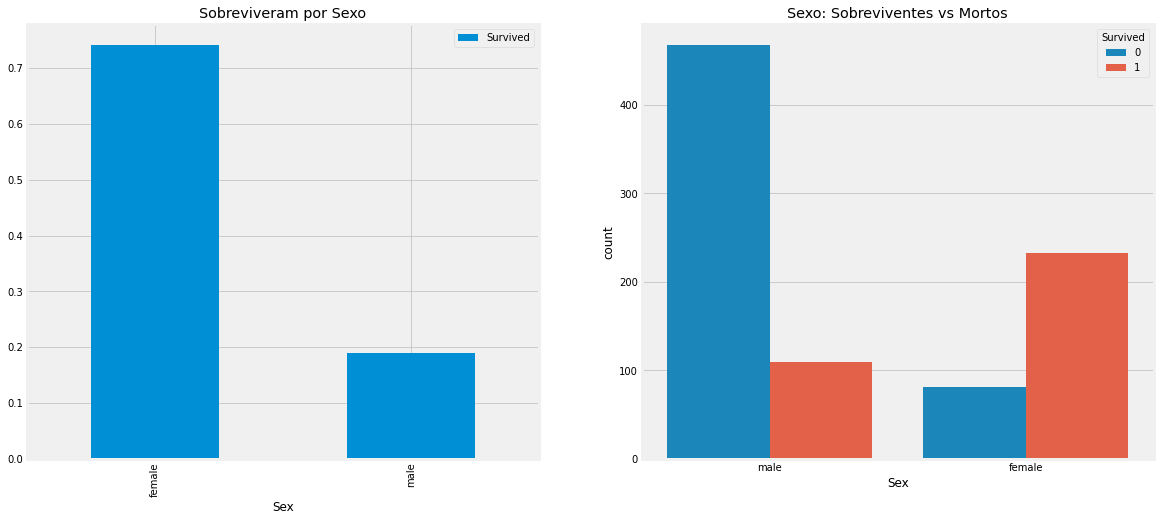

In [8]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0]) #gráfico da média de sobreviventes.
ax[0].set_title('Sobreviveram por Sexo')

sns.countplot('Sex',
              hue = 'Survived', # hue = nunace, que quer dizer para diferenciar os tons, no caso vamos fazer um count de Sexo, entao vamos diferenciar as cores por Sobreviveu ou Não Sobreviveu
              data = data,
              ax = ax[1])
ax[1].set_title('Sexo: Sobreviventes vs Mortos')

O número de homens no navio é muito maior do que o número de mulheres. Mesmo assim, o número de mulheres salvas é quase duas vezes o número de homens salvos. **A taxa de sobrevivência para mulheres no navio é quase 75%, enquanto a taxa de sobreviventes do sexo masculino é cerca de 18-19%**

<h5> Pclass -> Característica Ordinal</h5>


In [9]:
#tabela cruzada
pd.crosstab(data.Pclass, #na linha vamos colocar as classes dos passageiros
            data.Survived, # na coluna, vamos colocar a sobrevivência.
            margins = True).style.background_gradient(cmap = 'summer_r')
#As cores mais fortes querem dizer que o número é mais expressivo para aquela característica.
#Podemos ver que passageiros na classe 3 tiveram maior índice de mortes. 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Tipo de Classe')

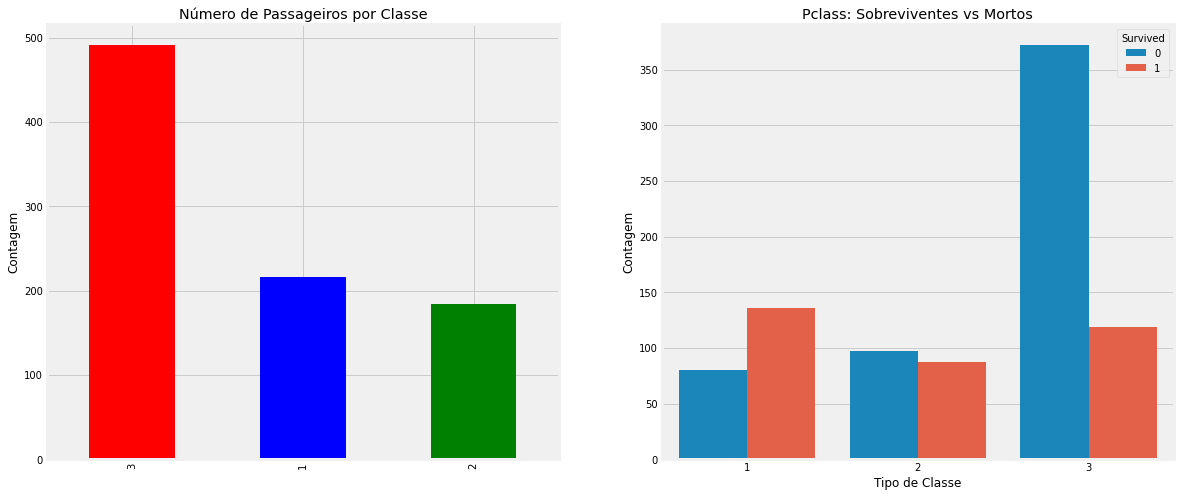

In [10]:
f, ax = plt.subplots(1,2 , figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color = ['r','b','g'], ax = ax[0])
ax[0].set_title('Número de Passageiros por Classe')
ax[0].set_ylabel('Contagem')

sns.countplot('Pclass', hue = 'Survived', data= data, ax = ax[1])
ax[1].set_title('Pclass: Sobreviventes vs Mortos')
ax[1].set_ylabel('Contagem')
ax[1].set_xlabel("Tipo de Classe")

Os passageiros de classe 1 e 2 tiveram índices de sobrevivência muito maiores do que as outras classes mais pobres, apesar de terem menos pessoas.

**Classe vs Taxa de Sobrevivência**

*Classe1 -> 63%*

*Classe2 -> 48%*

*Classe3 -> 25%*

In [11]:
pd.crosstab([data.Sex,
             data.Survived],
            data.Pclass, 
            margins = True).style.background_gradient(cmap = 'summer_r')

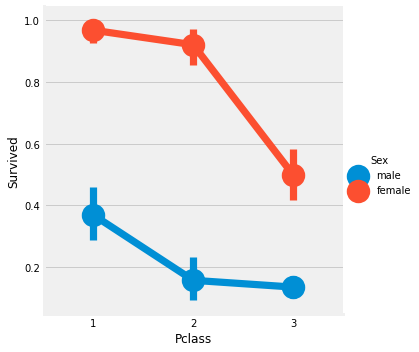

In [12]:
sns.factorplot('Pclass', 'Survived', hue = "Sex", data=data)
plt.show()

Neste caso, podemos usar o FactorPlot, pois ele é capaz de fazer a separação categórica de forma mais visual.

Olhando para a CrossTab e o Factorplot, podemos inferir que a sobrevivência de Mulheres da Classe 1 é perto de 95 a 96%, pois apenas 3 mulheres da classe 1 morreram.

É evidente que as mulheres de classe 1 foram priorizadas na hora do resgate. Até mesmo os homens da classe 1 tem menor taxa de sobrevivência.

<h5>    Idade (Age) -> Característica Contínua </h5>

In [13]:
print(("O passageiro mais velho do navio tinha {} anos").format(data['Age'].max()))
print(("O passageiro mais novo do navio tinha {} anos").format(data['Age'].min()))
print(("A média de idade dos passageiros do navio era de {} anos").format(data['Age'].mean()))


O passageiro mais velho do navio tinha 80.0 anos
O passageiro mais novo do navio tinha 0.42 anos
A média de idade dos passageiros do navio era de 29.69911764705882 anos


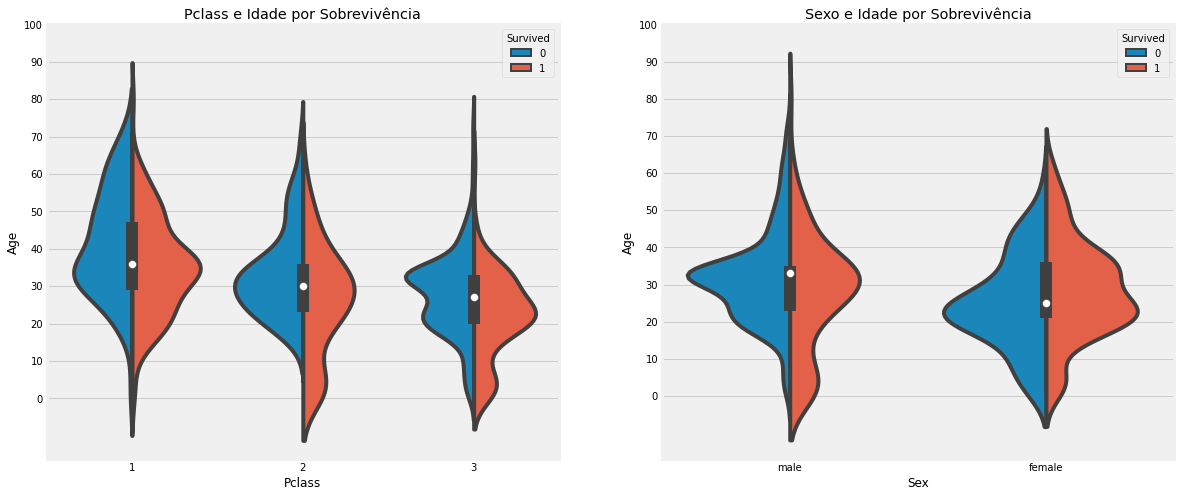

In [40]:
f, ax = plt.subplots(1,2, figsize = (18,8))

#Violinplot é um gráfico em que podemos analisar mais de uma variável, portanto, o desenho é uma figura.

sns.violinplot("Pclass", # eixo X
               "Age", # eixo Y
               hue = "Survived", #diferenciação de sobrevivência 
               data=  data, #declarando o dataframe
               split = True, #divide fazendo "metade azul e metade vermelho"
               ax = ax[0]) # declara qual é a figura que vamos plotar
ax[0].set_title("Pclass e Idade por Sobrevivência")
ax[0].set_yticks(range(0,110,10)) # serve para colocar linhas no eixo y, de 0 a 110, de 10 em 10.

sns.violinplot("Sex", #eixo x
               "Age", # eixo y
               hue = "Survived", # a diferenciação 
               data = data, # dataframe
               split = True, # dividir
               ax = ax[1]) # declara a coluna onde será plotado.

ax[1].set_title("Sexo e Idade por Sobrevivência")
ax[1].set_yticks(range(0,110,10))

plt.show()

**Observações:**

1) O número de crianças cresce com a Classe e a taxa de sobrevivência de passageiros com idade menor que 10 parace ser boa independente da classe.

2) As chances de sobrevivência  para passageiros com idade de 20-50 anos na classe 1 é maior e é ainda melhor para mulheres

3) Para homens, as chances de sobrevivência cai conforme cresce a idade.


Como visto anteriormente, a "Idade" tem 177 valores nulos no dataset. Para repor esses valores tidos como Nan, podemos substituí-los pela média da idade dos passageiros.

Porém, existe um problema: não podemos dar a idade de 29 anos para um passageiro de 4 anos deidade. Temos que descobrir qual é a faixa etária do passageiro.

Podemos analisar os nomes, pois alguns possuem Sr. e Sra. Depois, podemos tirar a média dos valores de Sr. e Sra. para os respectivos grupos.


In [16]:
data['Initial'] = 0 

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # vamos tirar apeanas as que possuem Sr. e Sra.

Utilizando '([A-Za-z]+)\.' como Regex, vamos extrair apenas as strings que ficam entre A-Z ou a-z e seguidos por um . (ponto), então, podemos extrair as iniciais do nome.

In [17]:
pd.crosstab(data.Initial,
            data.Sex).T.style.background_gradient(cmap = "summer_r") # checando as iniciais com o Sexo

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle e Mme significam Miss, então podemos subistituí-las por Miss e colocar a mesma coisa para os demais valores.



In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'] #primeira coisa que vamos substituir
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], # outras coisas que entrarão no lugar.
                        inplace=True) # colocar no mesmo lugar.

In [21]:
data.groupby("Initial")['Age'].mean() #checando as médias de idade por inicial

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Agora, podemos substituir os valores NaN de idades para os valores das idades médias de cada grupo.

In [22]:
data.loc[(data.Age.isnull())&(data.Initial == "Mr"), 'Age'] = 33 #Localiza o valor com as condições pedidas, depois substitui a idade por 33.
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [30]:

#Verificando a existência de valores nulos, daí podemos utilizar any() para retornar se existe "Algum" valor.
data.Age.isnull().any() 


False

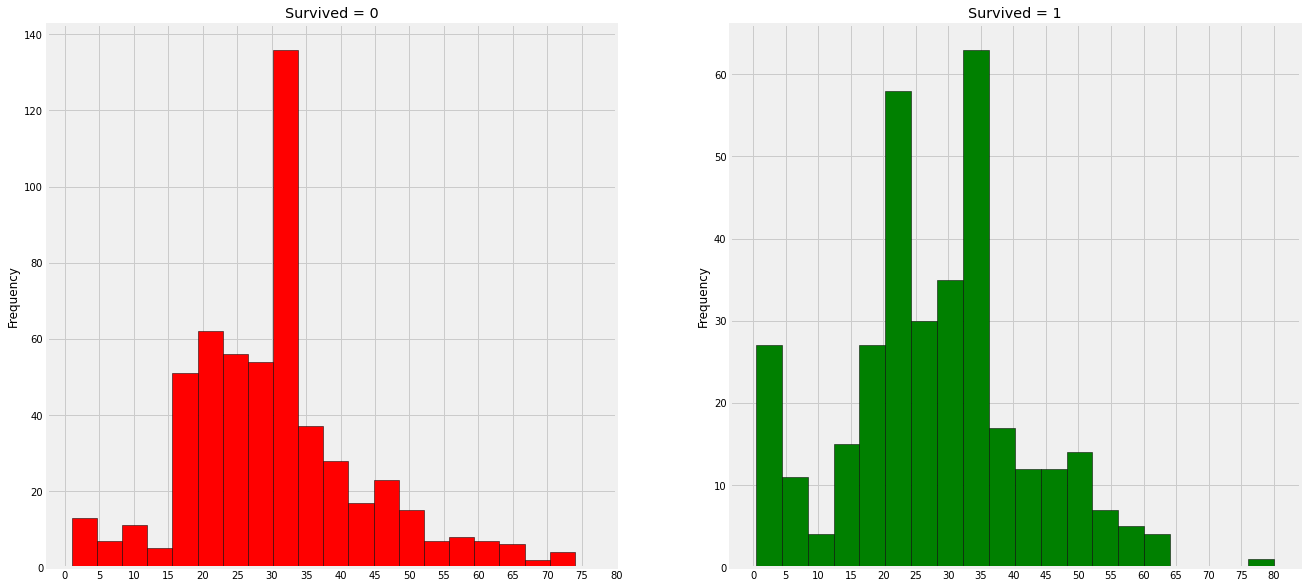

In [37]:
f, ax = plt.subplots(1,2, figsize = (20,10))

#grafico 1
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0],
                                          bins = 20,
                                          edgecolor = 'black',
                                          color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

#grafico 2
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1],
                                          color = 'green', 
                                          bins = 20, 
                                          edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()



**Observações:**

1) As crianças de 0 a 5 anos foram salvos em larga escala
2) O passageiro mais velho ( de 80 anos) foi salvo
3) O número máximo de mortes estava no grupo de 30 a 40 anos

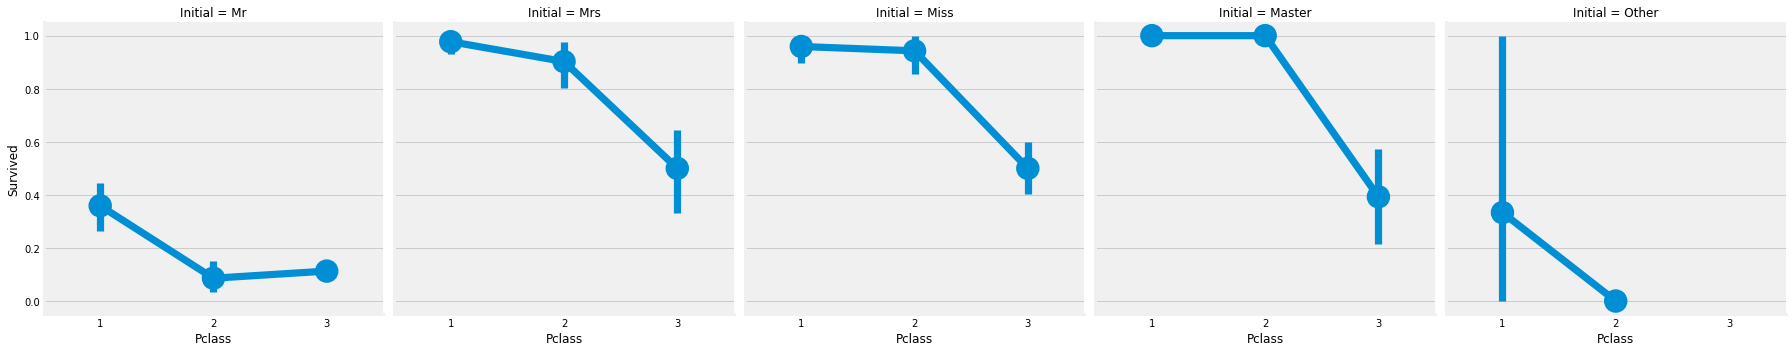

In [39]:
sns.factorplot('Pclass',
               'Survived',
               col = 'Initial',
               data = data)
plt.show()

A lei de Mulheres e Crianças foi efetivada apesar das classes.

<h5> Embarked -> Valor Categórico </h5>

**Obs:** Embarked significa qual foi o porto de Embarcação do passageiro no Titanic

In [42]:
pd.crosstab([data.Embarked,#linha
            data.Pclass], #linha
            
            [data.Sex, #coluna
             data.Survived], #coluna
            margins = True).style.background_gradient(cmap = "summer_r")

Chances de Sobrevivência por Porto de Embarcação

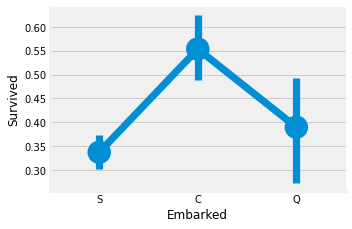

In [44]:
sns.factorplot("Embarked", # eixo x
               "Survived",  # eixo y
               data = data)

fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

O porto **C** teve maiores chances de sobrevivência (cerca de 55% ) enquanto o **menor foi o porto S**

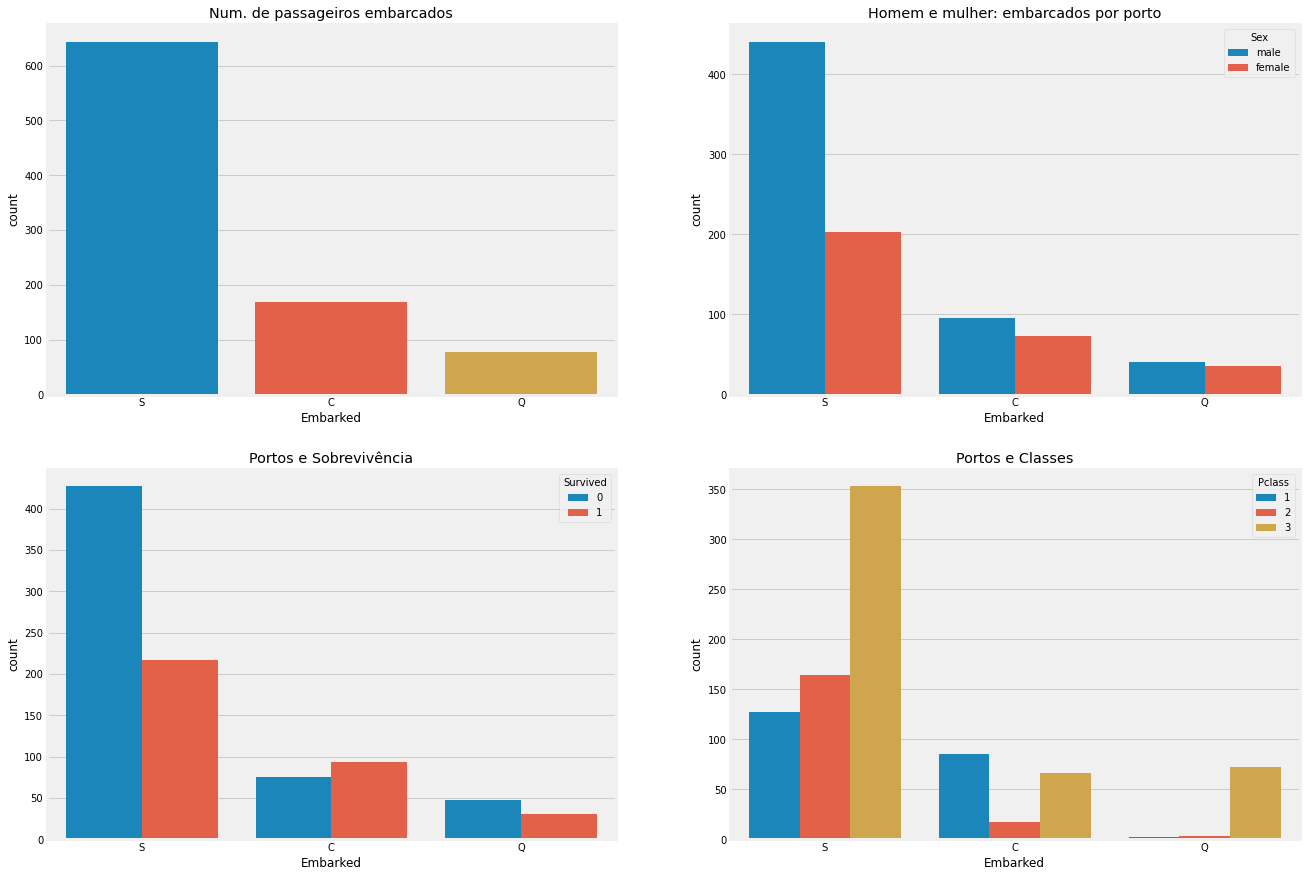

In [59]:
f, ax = plt.subplots(2,2, figsize = (20,15))

#contagem dos diferentes Portos
sns.countplot("Embarked", 
              data = data,
              ax = ax[0,0])
ax[0,0].set_title("Num. de passageiros embarcados")

#contagem de homens e mulheres que embarcaram em diferentes portos.
sns.countplot("Embarked", 
              hue = "Sex",
              data= data,
              ax = ax [0,1])
ax[0,1].set_title("Homem e mulher: embarcados por porto")


#contagem de passageiros que sobreviveram nos diferentes portos.


sns.countplot("Embarked",
              hue = "Survived",
              data = data,
              ax = ax[1,0])
ax[1,0].set_title("Portos e Sobrevivência")

#Contagem do tipo de porto e das classes..

sns.countplot("Embarked",
              hue = "Pclass",
              data = data,
              ax = ax[1,1])

ax[1,1].set_title("Portos e Classes")




plt.show()